In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import xarray as xr
import dask

In [4]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-20-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
#truths = extra_variables.targets[:,:30].values

In [6]:
ha = extra_variables.hyai.values
hb = extra_variables.hybi.values
P0 = 1e5
PS = 1e5
P = (P0*ha+PS*hb)/100.
print(P)

[   2.25523952    5.03169186   10.15794743   18.55531707   30.66912293
   45.86747661   63.32348287   80.70141822   94.94104236  111.6932109
  131.40127063  154.58680689  181.86335266  213.95282075  251.70441717
  296.11721635  348.36658835  409.83521938  482.14992881  567.22442061
  652.33296901  730.44589162  796.36307061  845.35366669  873.71586636
  900.32463148  924.96446241  947.43233453  967.53862454  985.11219025
 1000.        ]


In [2]:
train = np.load("/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Space_Time_W_Training.npy")
test = np.load("/fast/gmooers/Preprocessed_Data/W_Big_Half_Deep_Convection/Space_Time_W_Test.npy")

In [3]:
print(train.shape)
print(train.nbytes)
print(test.shape)
print(test.nbytes+train.nbytes)

(111206, 30, 128)
3416248320
(27802, 30, 128)
4270325760


In [4]:
print(4270325760./1000000.)

4270.32576


In [5]:
dist = test[0,:,:]
print(dist.shape)

(30, 128)


https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

In [6]:
#plt.hist(dist)

In [7]:
mu, std = norm.fit(dist)

(30, 128)
0.281814222415681 0.35643469742567985


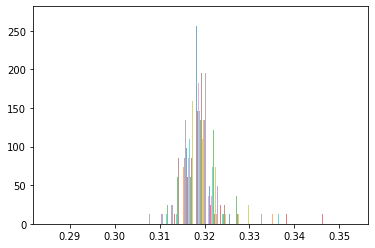

In [8]:
print(dist.shape)
plt.hist(dist, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
print(xmin, xmax)

Text(0.5, 1.0, 'Fit results: mu = 0.32,  std = 0.00')

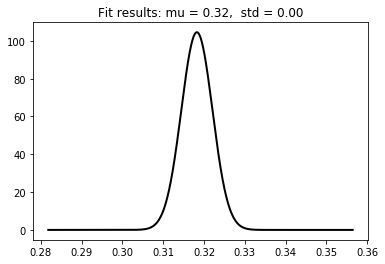

In [9]:
x = np.linspace(xmin, xmax, 3480)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

In [13]:
print(np.sum(p)/3480*(xmax-xmin))

0.999712643678161
